### Preparing Data

Generating 100 datapoints from the distribution $N(\left( \begin{array}{c} 2 \\ 2 \end{array}\right),\left( \begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right))$.  

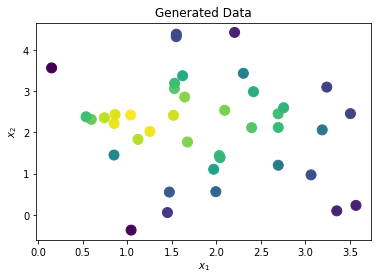

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

Dataset = []
for _ in range(0,40):
    Dataset.append(list(np.random.default_rng().normal(2, 1, 2)))

x1 = [p[0] for p in Dataset]
x2 = [p[1] for p in Dataset]
x1x2 = np.vstack([x1,x2])
z = gaussian_kde(x1x2)(x1x2)
plt.scatter(x1, x2, c=z, s=100)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Generated Data")
plt.show()

### Generating the likelihood function

<ipython-input-2-7e6122803ef3>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


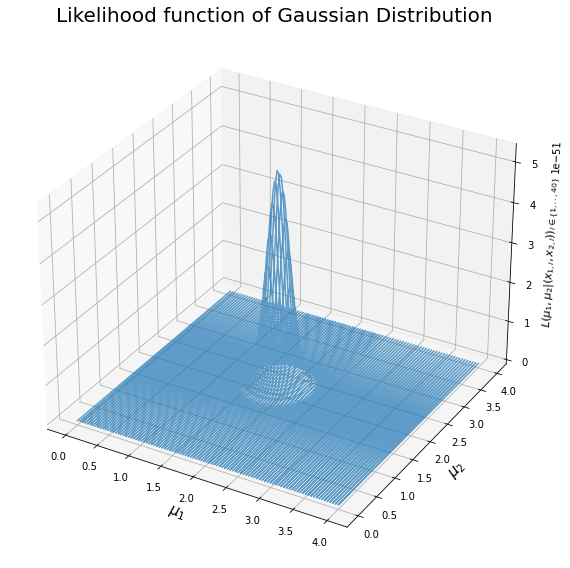

In [2]:
from MCMC_DianZhang.Dian_MCMC.Dian_MCMC.StandardGaussianLikeli import Likelihood_StandardGaussian

Likeli = Likelihood_StandardGaussian(Dim=2, Dataset=Dataset)
Grid = np.linspace(0, 4, 100)
x = []
y = []
z = []
r = len(Grid)
for g in Grid:
    y += list(Grid)
    x += [g]*r
    z += [Likeli.L([g, k]) for k in Grid]
fig = plt.figure(figsize=(8, 8), facecolor="white")
Gau = fig.add_subplot(projection="3d")
Gau.plot(x, y, z, alpha=0.7)
Gau.set_xlabel("$\mu_1$", fontsize=15)
Gau.set_ylabel("$\mu_2$", fontsize=15)
Gau.set_zlabel("$L(\mu_1, \mu_2| {(x_{1,i}, x_{2,i})})_{i \in \{1,..,40\}}$", fontsize=11)
Gau.set_title("Likelihood function of Gaussian Distribution", fontsize=20)
fig.tight_layout()
fig.show()

### Testing the Metropolis-Hasting MCMC algorithm with the likelihood function generated above

In [3]:
from MCMC_DianZhang.Dian_MCMC.Dian_MCMC.MHMC import MHMC
from MCMC_DianZhang.Dian_MCMC.Dian_MCMC.ProposalDistributions import UniformProposalDistribution, GausianProposalDistribution
q = UniformProposalDistribution(radius=0.14, Dim=2)
MetropolisHasting = MHMC(rho=Likeli.L)
Theta, accpetanceRate = MetropolisHasting.generate(theta0=[0,0], qProb=q.qProb, qSamp=q.qSample, steps=3000, OutputAcceptanceRate = True)

Acceptance rate of the MHMCMC Algorithm with Uniform Proposal Distribution = 0.728


<ipython-input-4-ca54626b4f8c>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


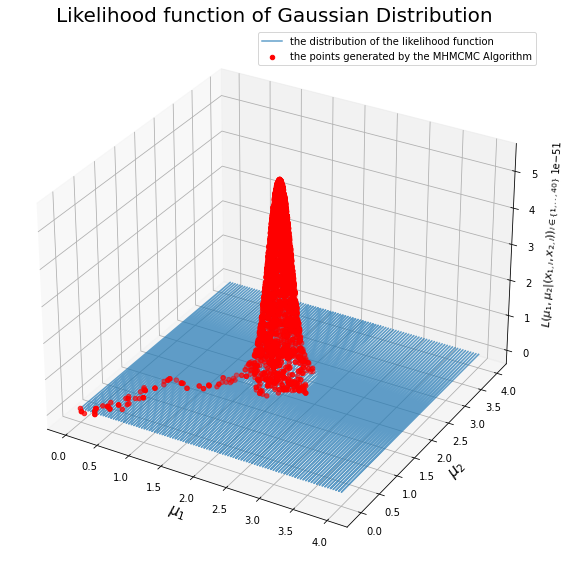

In [4]:
print(f"Acceptance rate of the MHMCMC Algorithm with Uniform Proposal Distribution = {accpetanceRate:.3f}")

fig = plt.figure(figsize=(8, 8), facecolor="white")
Gau = fig.add_subplot(projection="3d")
Gau.plot(x, y, z, alpha=0.7, label="the distribution of the likelihood function")
Gau.scatter([theta[0] for theta in Theta], [theta[1] for theta in Theta], [Likeli.L(theta) for theta in Theta], color="red", label="the points generated by the MHMCMC Algorithm")
Gau.legend()
Gau.set_xlabel("$\mu_1$", fontsize=15)
Gau.set_ylabel("$\mu_2$", fontsize=15)
Gau.set_zlabel("$L(\mu_1, \mu_2| {(x_{1,i}, x_{2,i})})_{i \in \{1,..,40\}}$", fontsize=11)
Gau.set_title("Likelihood function of Gaussian Distribution", fontsize=20)
fig.tight_layout()
fig.show()

In [5]:
q = GausianProposalDistribution(sd=0.2, Dim=2)
MetropolisHasting = MHMC(rho=Likeli.L)
Theta, accpetanceRate = MetropolisHasting.generate(theta0=[0,0], qProb=q.qProb, qSamp=q.qSample, steps=3000, OutputAcceptanceRate = True)

Acceptance rate of the MHMCMC Algorithm with Gaussian Proposal Distribution = 0.462


<ipython-input-6-da99960ac9be>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


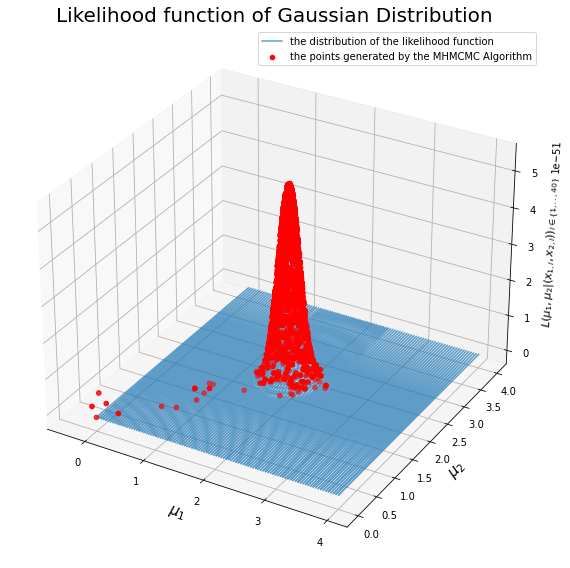

In [6]:
print(f"Acceptance rate of the MHMCMC Algorithm with Gaussian Proposal Distribution = {accpetanceRate:.3f}")

fig = plt.figure(figsize=(8, 8), facecolor="white")
Gau = fig.add_subplot(projection="3d")
Gau.plot(x, y, z, alpha=0.7, label="the distribution of the likelihood function")
Gau.scatter([theta[0] for theta in Theta], [theta[1] for theta in Theta], [Likeli.L(theta) for theta in Theta], color="red", label="the points generated by the MHMCMC Algorithm")
Gau.legend()
Gau.set_xlabel("$\mu_1$", fontsize=15)
Gau.set_ylabel("$\mu_2$", fontsize=15)
Gau.set_zlabel("$L(\mu_1, \mu_2| {(x_{1,i}, x_{2,i})})_{i \in \{1,..,40\}}$", fontsize=11)
Gau.set_title("Likelihood function of Gaussian Distribution", fontsize=20)
fig.tight_layout()
fig.show()

### Testing the Hamiltonian MCMC algorithm with the Gaussian likelihood function

In [7]:
from HMC.HMC import HMC

In [9]:
from typing import List, Callable

def U(theta: List[float]) -> float: # the potential energy function: U(theta) = -log(probability distribution of theta)
    return (- np.log(Likeli.L(theta)))

def grad_U(theta: List[float]) -> float:
    DRho = Likeli.dLdmu(theta)
    Rho = Likeli.L(theta)*(-1)
    return np.array([DRho/Rho for DRho in DRho])

In [10]:
theta_accept, theta_reject = HMC(epoch=3000, L=20, epsilon=0.001, U=U, grad_U=grad_U, current_theta=[1, 1])

In [18]:
print('The acceptance rate is', (len(theta_accept))/(len(theta_reject)+len(theta_accept)))

The acceptance rate is 0.9203333333333333


<ipython-input-11-3dd9674c0285>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


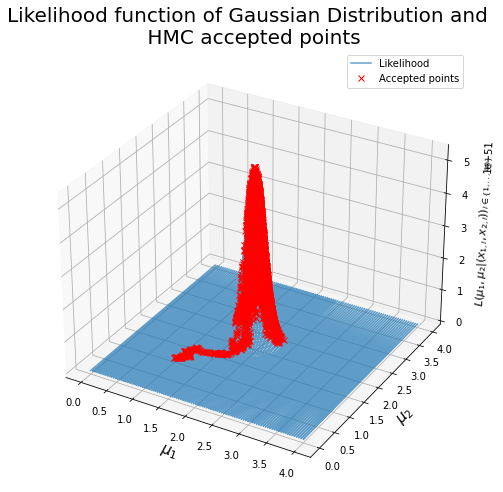

In [11]:
Grid = np.linspace(0, 4, 100)
x = []
y = []
z = []
r = len(Grid)

for g in Grid:
    y += list(Grid)
    x += [g]*r
    z += [Likeli.L([g, k]) for k in Grid]

fig = plt.figure(figsize=(8, 8), facecolor="white")

Gau = fig.add_subplot(projection="3d")
Gau.plot(x, y, z, alpha=0.7, label='Likelihood')
Gau.set_xlabel("$\mu_1$", fontsize=15)
Gau.set_ylabel("$\mu_2$", fontsize=15)
Gau.set_zlabel("$L(\mu_1, \mu_2| {(x_{1,i}, x_{2,i})})_{i \in \{1,..,40\}}$", fontsize=11)
Gau.set_title("Likelihood function of Gaussian Distribution and \n HMC accepted points", fontsize=20)

x = []
y = []
z = []
for i in theta_accept:
    x.append(i[0])
    y.append(i[1])
    z.append(Likeli.L([i[0], i[1]]))
Gau.plot(x, y, z, 'x', color='red', label='Accepted points')

Gau.legend()
# fig.tight_layout()
fig.show()

#### Contour Plot

In [14]:
from numpyro import distributions

target_dist = distributions.MultivariateNormal(
    np.array([2, 2]), np.array([[1, 0], 
                           [0, 1.]]))

def target_log_prob_fn(state):
    return target_dist.log_prob(state)

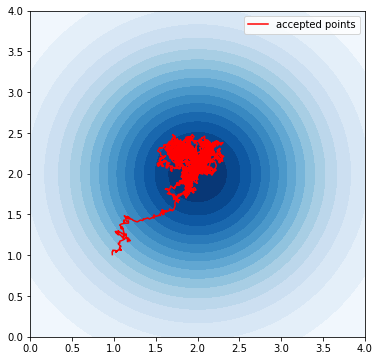

In [15]:
X, Y = np.meshgrid(np.linspace(0, 4, 100), 
                   np.linspace(0, 4, 100), 
                  )

_X = np.stack([X, Y]).reshape(2, -1)
probs = np.exp(target_log_prob_fn(_X.T).reshape((100, 100)))

fig, ax = plt.subplots(figsize=(6,6))
ax.contourf(
    X, Y,
    probs, 
    levels=15,
    cmap='Blues'
)

ax.plot(x, y, color='red', label='accepted points')

ax.legend()